# San Francisco's Crime in 2016

## Business Understanding

Using all the crime data recorded by the San Francisco Police Department in 2016, the goal is to find the answers
of three questions that reveal some insights that can help the city be safer.

The notebook is organised in different sections aimed to understand the purpose of this analysis, the dataset used
to answer to these questions, and then extract some information to produce the desired results.

The questions to answer are:

 - What is the most frequent type of crime in San Francisco?
 - What is the safest neighborhood in the city? And the least safe?
 - How are all these crimes resolved?

## Data Understanding

First, let's take a look at how the dataset looks and what can be done with it. The necessary packages and dataset to be used throughout the notebook are first loaded.

In [2]:
# Load packages and default settings

import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [3]:
# Load the dataset

df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


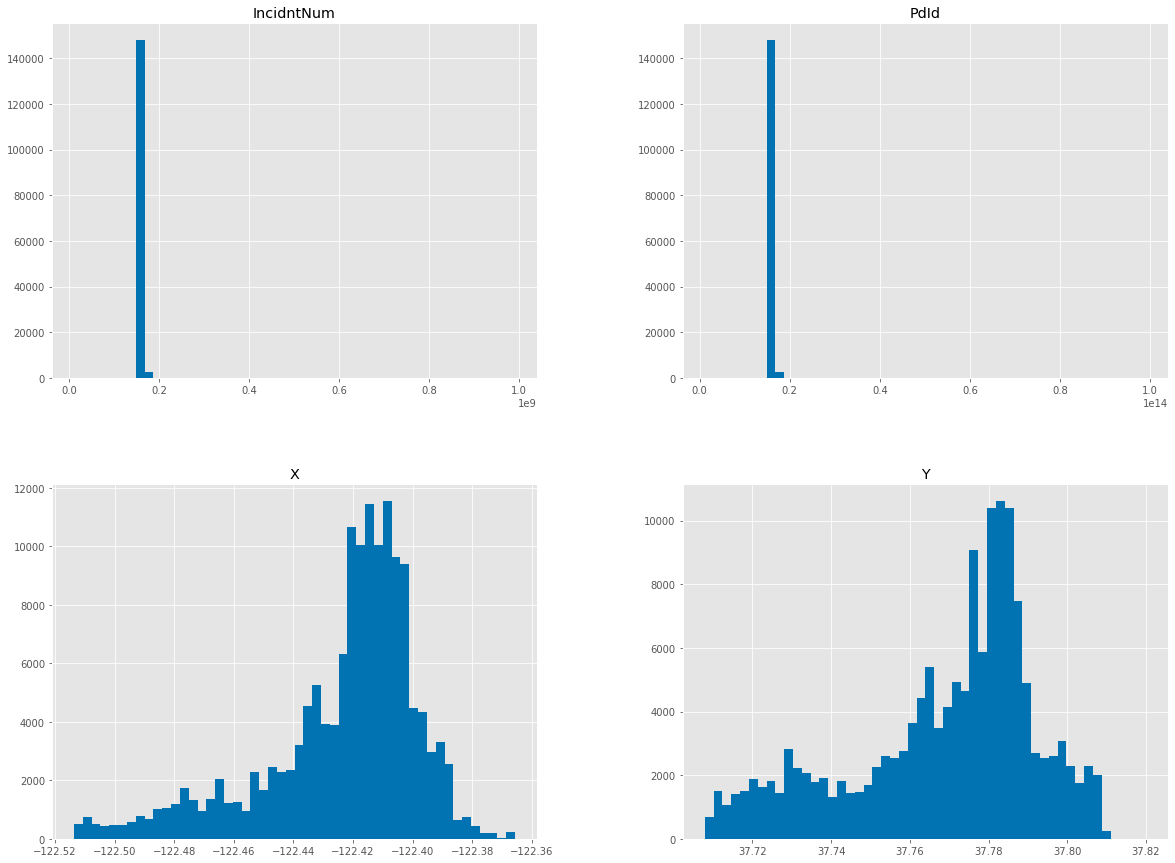

In [4]:
# Histogram of the numerical data
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [5]:
# Dimension of listing dataset in number of rows and columns
df.shape

(150500, 13)

In [6]:
# Statistical information about numerical variables
df.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


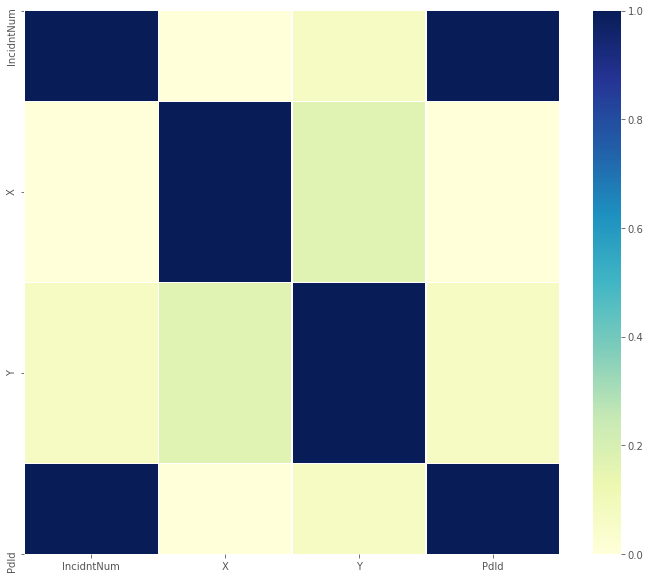

In [7]:
# Map of correlation beetwen variables

corrmat = df.corr(method = 'spearman')
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corrmat, ax = ax, cmap = "YlGnBu", linewidths = 0.1)

## Data Preparation

To answer the three questions presented at the beginning of the notebook, some data wrangling is needed to obtain the variables that will provide the information we are seeking. This process is detailed in this section.

In [20]:
# First, let's see how many crimes there are for each type of category

crimeFreq = df['Category'].value_counts().reset_index()
crimeFreq.head(20)

,index,Category
0,LARCENY/THEFT,40409
1,OTHER OFFENSES,19599
2,NON-CRIMINAL,17866
3,ASSAULT,13577
4,VANDALISM,8589
5,VEHICLE THEFT,6419
6,WARRANTS,5914
7,BURGLARY,5802
8,SUSPICIOUS OCC,5782
9,MISSING PERSON,4338


In [21]:
# Let's change the name of the columns for a clearer view

crimeFreq.rename(columns = {'index': 'Crime', 'Category': 'Crime Count'}, inplace = True)
crimeFreq.head()

,Crime,Crime Count
0,LARCENY/THEFT,40409
1,OTHER OFFENSES,19599
2,NON-CRIMINAL,17866
3,ASSAULT,13577
4,VANDALISM,8589


In [22]:
# Now we can calculate what percentage of the total number of crimes represent each group

crimeFreq['Percentage'] = crimeFreq['Crime Count']/np.sum(crimeFreq['Crime Count'])*100
crimeFreq.head()

,Crime,Crime Count,Percentage
0,LARCENY/THEFT,40409,26.849834
1,OTHER OFFENSES,19599,13.022591
2,NON-CRIMINAL,17866,11.871096
3,ASSAULT,13577,9.021262
4,VANDALISM,8589,5.706977


In [27]:
# Let's see how many crimes are in each district

districtCrimes = df[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().sort_values(by = ['Category'], ascending = False)
districtCrimesSum = districtCrimes[['Category']].sum()
districtCrimes.head(25)

,Category
PdDistrict,
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922


In [28]:
# Calculating again the percentage of the total number of crimes

districtCrimes['Percentage'] = districtCrimes['Category']/np.sum(districtCrimes['Category'])*100
districtCrimes.head()

,Category,Percentage
PdDistrict,,
SOUTHERN,28445,18.900458
NORTHERN,20100,13.355570
MISSION,19503,12.958890
CENTRAL,17666,11.738284
BAYVIEW,14303,9.503718


In [29]:
# Renaming

districtCrimes.rename(columns = {'Category':'Number of Crimes'}, inplace = True)
districtCrimes.head()

,Number of Crimes,Percentage
PdDistrict,,
SOUTHERN,28445,18.900458
NORTHERN,20100,13.355570
MISSION,19503,12.958890
CENTRAL,17666,11.738284
BAYVIEW,14303,9.503718


In [30]:
# Since we obtained this information using a groupby, we need to include an index for the districts as part of the
# dataframe for better plotting later.

districts = ('SOUTHERN', 'NORTHERN', 'MISSION', 'CENTRAL', 'BAYVIEW', 'INGLESIDE', 'TARAVAL', 'TENDERLOIN', 'RICHMOND', 'PARK')
districtCrimes['District'] = districts;
districtCrimes.head(20)

,Number of Crimes,Percentage,District
PdDistrict,,,
SOUTHERN,28445,18.900458,SOUTHERN
NORTHERN,20100,13.355570,NORTHERN
MISSION,19503,12.958890,MISSION
CENTRAL,17666,11.738284,CENTRAL
BAYVIEW,14303,9.503718,BAYVIEW
INGLESIDE,11594,7.703706,INGLESIDE
TARAVAL,11325,7.524967,TARAVAL
TENDERLOIN,9942,6.606024,TENDERLOIN
RICHMOND,8922,5.928279,RICHMOND


In [18]:
# A simple groupby to see how these variables are correlated

df[['DayOfWeek', 'Category', 'PdDistrict']].groupby(['DayOfWeek', 'PdDistrict']).agg(['count'])

Category
                        count
DayOfWeek PdDistrict         
Friday    BAYVIEW        2180
          CENTRAL        2876
          INGLESIDE      1826
          MISSION        2905
          NORTHERN       3107
...                       ...
Wednesday PARK           1330
          RICHMOND       1316
          SOUTHERN       3979
          TARAVAL        1631
          TENDERLOIN     1476

[70 rows x 1 columns]

In [8]:
# Now let's see how the crimes are distributed as a function of their resolution

resolutionCrimes = df['Resolution'].value_counts().reset_index()
resolutionCrimes.head()

,index,Resolution
0,NONE,107780
1,"ARREST, BOOKED",39416
2,UNFOUNDED,1608
3,JUVENILE BOOKED,1056
4,EXCEPTIONAL CLEARANCE,371


In [9]:
resolutionCrimes.rename(columns={'index': 'Resolution', 'Resolution': 'Number of Crimes'}, inplace=True)
resolutionCrimes.head()

,Resolution,Number of Crimes
0,NONE,107780
1,"ARREST, BOOKED",39416
2,UNFOUNDED,1608
3,JUVENILE BOOKED,1056
4,EXCEPTIONAL CLEARANCE,371


In [10]:
# We might also look at the percentage as done previously

resolutionCrimes['Percentage'] = resolutionCrimes['Number of Crimes']/np.sum(resolutionCrimes['Number of Crimes'])*100
resolutionCrimes.head()

,Resolution,Number of Crimes,Percentage
0,NONE,107780,71.614618
1,"ARREST, BOOKED",39416,26.190033
2,UNFOUNDED,1608,1.068439
3,JUVENILE BOOKED,1056,0.701661
4,EXCEPTIONAL CLEARANCE,371,0.246512


## Data modeling and Results Evaluation

Now that we have the variables that contain the desired information, we'll go directly to obtain visually and graphically these insights so we can later present the results in an easy way.

Also, we'll discuss the obtained results and how we can answer the three questions.

In [24]:
# We can define a function to help us plot the information obtained

def percCountPlot(df, colX, percCol, title):
    """"
    Description: This function can be used to plot a histogram
    using two columns of a dataframe, one being a categorical 
    variable and the other the percentage of the total count of
    each of the categories.
    
    Arguments:
        df: dataframe
        colX: column of the df with categorical values
        perCol: column of the df with the percentage of the total
                count of the categorical value
        title: title of the plot to be output
        
    Return: 
        No returned variables, but a bar plot is output.
    """
    
    countPlot = df[:10].plot.bar(colX, percCol, legend = False)
    countPlot.set_ylabel('% of Total Crimes')
    countPlot.set_title(title)
    
    return;
    

### What is the most common crime in San Francisco?

The first question is what is the most frequent type of crime in the city.

Let's see how many of each type of crime were recorded in 2016.

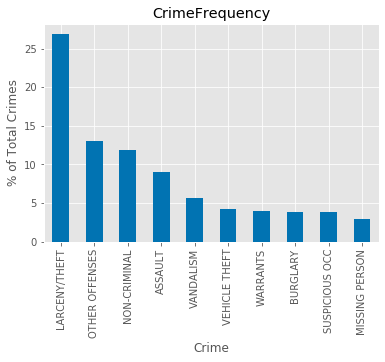

In [25]:
# We can now plot the distribution of crimes depending on its category

percCountPlot(crimeFreq, 'Crime', 'Percentage', 'Crime Frequency')

It is clear that the most frequent type of crime is larceny/theft by a big margin respect to the other categories. This is an indication of the target of these crimes, very probably tourists on very crowded areas during broad daylight or late at night.

### What is the safest neighborhood in San Francisco?

Now let's look at the second question of interest. The idea is to see what are the neighborhoods where most crimes occur, and the ones with least crime frequency.


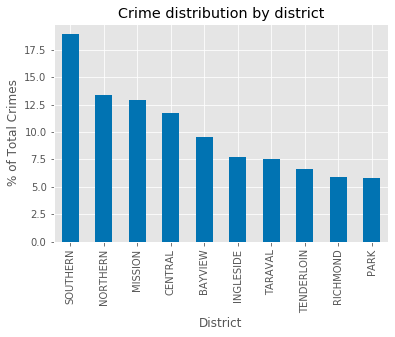

In [31]:
# Show number of crimes per district

percCountPlot(districtCrimes, 'District', 'Percentage', 'Crime distribution by district')

The neighborhoods most affected by the crime are Southern and Northern, where a lot of touristic places are located. On the other hand, the districts with the least crime are Park and Richmond.

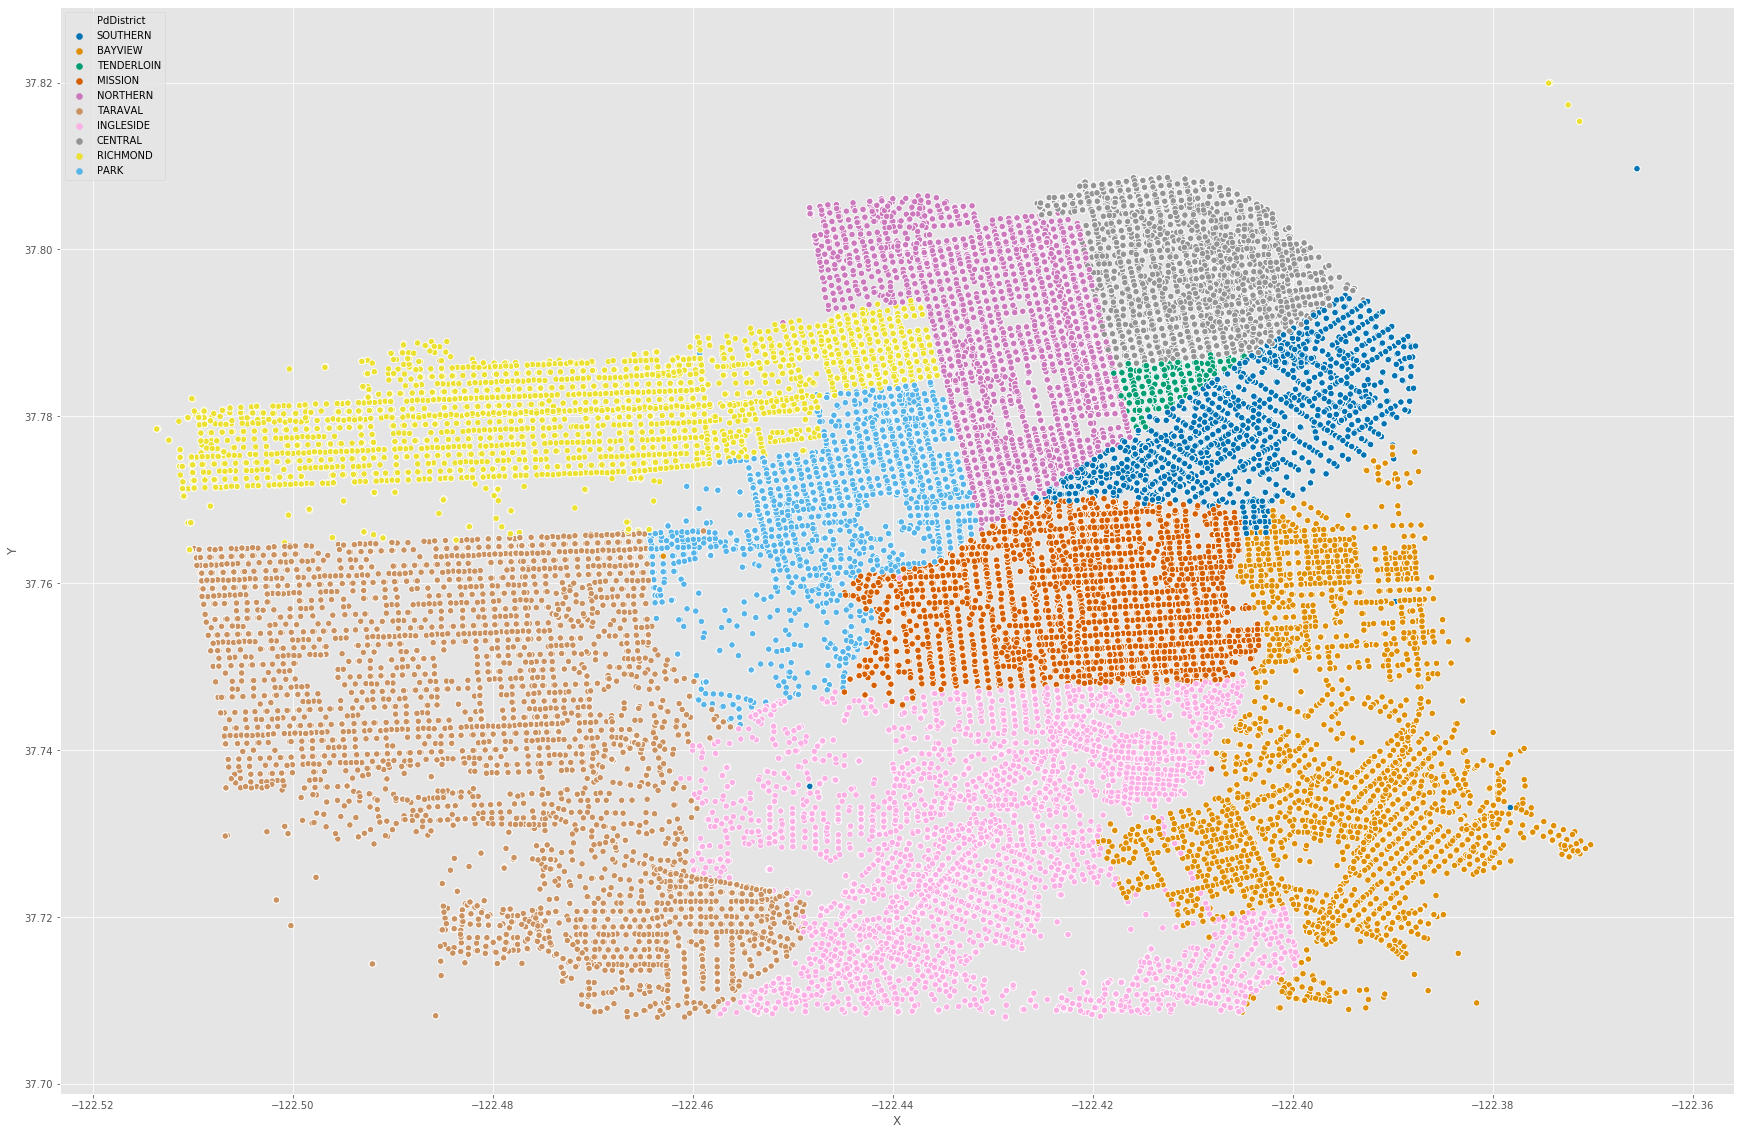

In [32]:
# Map of crimes

a4_dims = (30, 20)
fig, ax = plt.subplots(figsize = a4_dims)
crimeMap = sns.scatterplot(x = 'X', y = 'Y', data = df, hue = 'PdDistrict', s = 40)
crimeMap.set_xlabel = 'Longitude [º]'
crimeMap.set_ylabel = 'Latitude [º]'

### How are all these crimes resolved?

Finally, the third question about how are all these crimes resolved.

Text(0.5, 1.0, 'Crime distribution by resolution')

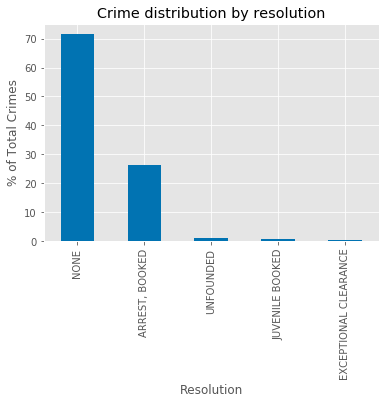

In [19]:
# Show the distribution of the crimes as function of their resolution

percCountPlot(resolutionCrimes, 'Resolution', 'Percentage', 'Crime distribution by resolution')


It is remarkable that more 70% of the crimes are not resolved. This is a very telling insight of the crime in the city if the most frequent offense is linked to this information. If the affected people by these crimes are nearly all tourists or people passing by, they are most probably attacked in very crowded areas in which to find the culprits is very difficult.

The obvious sequence of events is these people reporting the crime, and it gets logged without any concrete investigation really being carried out.

### Additional analysis of the data

As additional information, some extra analysis has been done to see how the variables in the dataset are related to each other and to try to find any trends in this dataset.

For that, a few features of the dataset will be plotted together. 

In [33]:
df[['DayOfWeek', 'Category', 'PdDistrict']].groupby(['DayOfWeek', 'PdDistrict']).agg(['count'])

Category
                        count
DayOfWeek PdDistrict         
Friday    BAYVIEW        2180
          CENTRAL        2876
          INGLESIDE      1826
          MISSION        2905
          NORTHERN       3107
...                       ...
Wednesday PARK           1330
          RICHMOND       1316
          SOUTHERN       3979
          TARAVAL        1631
          TENDERLOIN     1476

[70 rows x 1 columns]

In [55]:
# Let's define a function that can help us plot two variables of interest each time

def twoCountPlot(colX, colZ, xLabel, title, order):
    """"
    Description: This function can be used to plot a count plot
    using two features of a dataframe, both consisting of categorical 
    variables. It will provide how for each value of colX, how many
    ocurrences there are in the dataframe grouped by colZ values.
    
    Arguments:
        df: dataframe
        colX: column of the df with categorical values
        colZ: column of the df with categorical values for which colX
              will be grouped by.
        title: title of the plot to be output
        order: number of different value of colX to be displayed in  
               the plot.
        
    Return: 
        No returned variables, but a count plot is output.
    """
    
    plt.figure(figsize = (15, 6))
    ax = sns.countplot(x = colX, hue = colZ, data = df, order = df[colX].value_counts().iloc[:order].index)

    ax.set_xlabel(xLabel, weight = 'normal', size = 15)
    ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

    plt.title(title, fontsize = 18)
    plt.show()
    return;

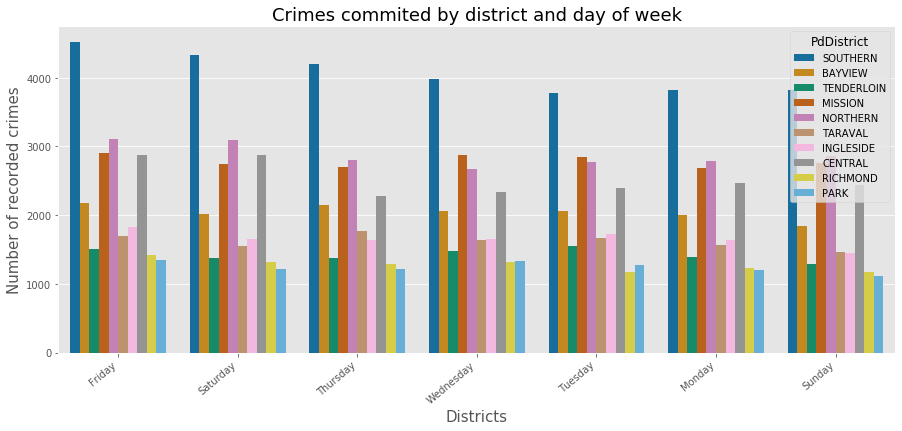

In [56]:
# Show number of crimes per district and day of week

twoCountPlot('DayOfWeek', 'PdDistrict', 'Districts', 'Crimes commited by district and day of week', 100)

As can be expected, the days of the week with more crimes are on the weekends, when there is more affluence of people in the city.

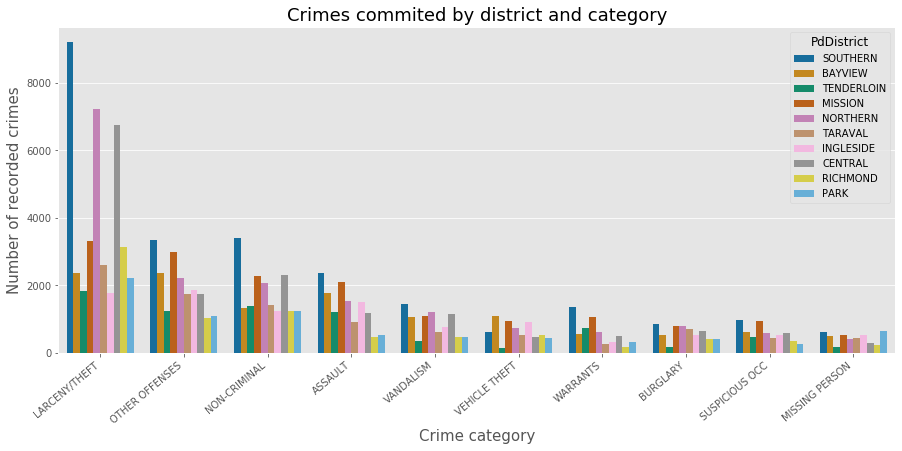

In [58]:
#Show number of crimes per category and district

twoCountPlot('Category', 'PdDistrict', 'Crime category', 'Crimes commited by district and category', 10)

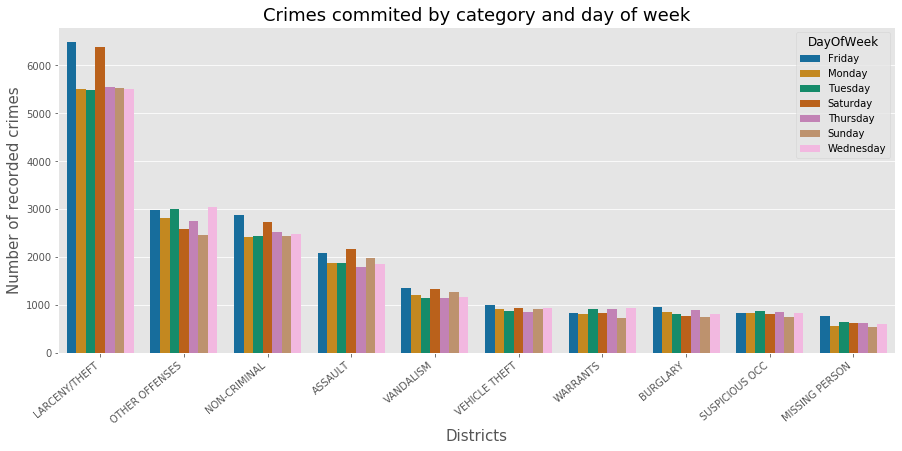

In [60]:
#Show number of crimes per category and district

twoCountPlot('Category', 'DayOfWeek', 'Districts', 'Crimes commited by category and day of week', 10)

Again, it is evidenced that the most frequent crime is larceny/theft, that they occurred mainly on the weekends (especially on Fridays), and located around the neighborhoods of Southern and Northern. 

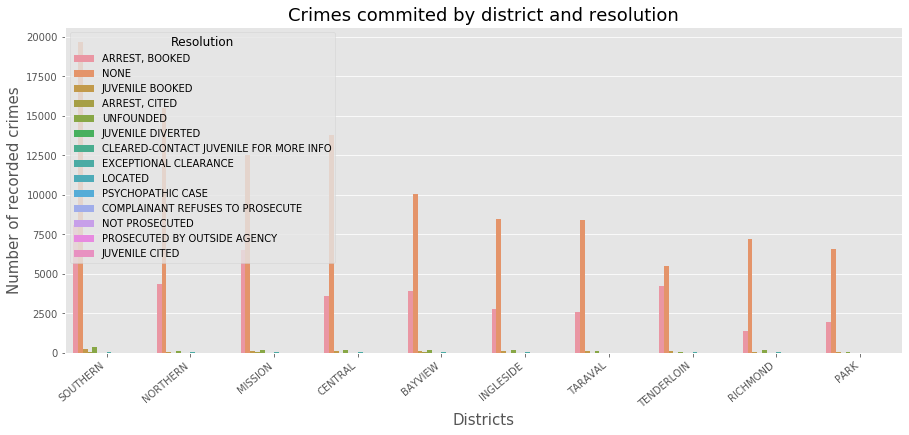

In [61]:
#Show number of crimes per district and resolution

twoCountPlot('PdDistrict', 'Resolution', 'Districts', 'Crimes commited by district and resolution', 10)